## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 베스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [1]:
# 판다스, 넘파이, 씨본을 불러옵니다.

import pandas as pd
import numpy as np
import seaborn as sns

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline 

## 시각화를 위한 한글 폰트 설정하기

In [2]:
import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

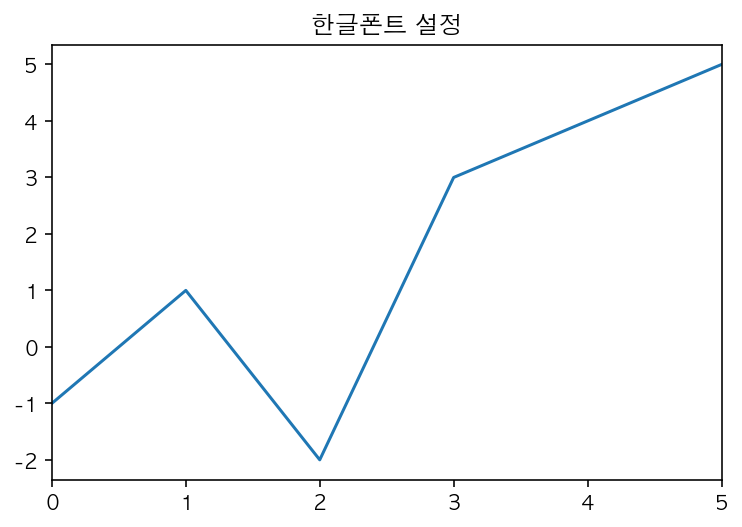

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1, 1, -2, 3, 4, 5]).plot(title="한글폰트 설정")

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [5]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [6]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [7]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [8]:
# 파일을 불러와 df 라는 변수에 담습니다.

df = pd.read_csv("data/상가업소정보_201912_01.csv", sep="|")
df.shape

(573680, 39)

### 데이터 크기 보기

In [9]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(573680, 39)

### info 보기

In [10]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
지점명          76674 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
표준산업분류코드     539290 non-null object
표준산업분류명      539290 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null int64
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번부번지        474924 non-null float64
지번주소         573680 non-null obje

### 결측치 보기

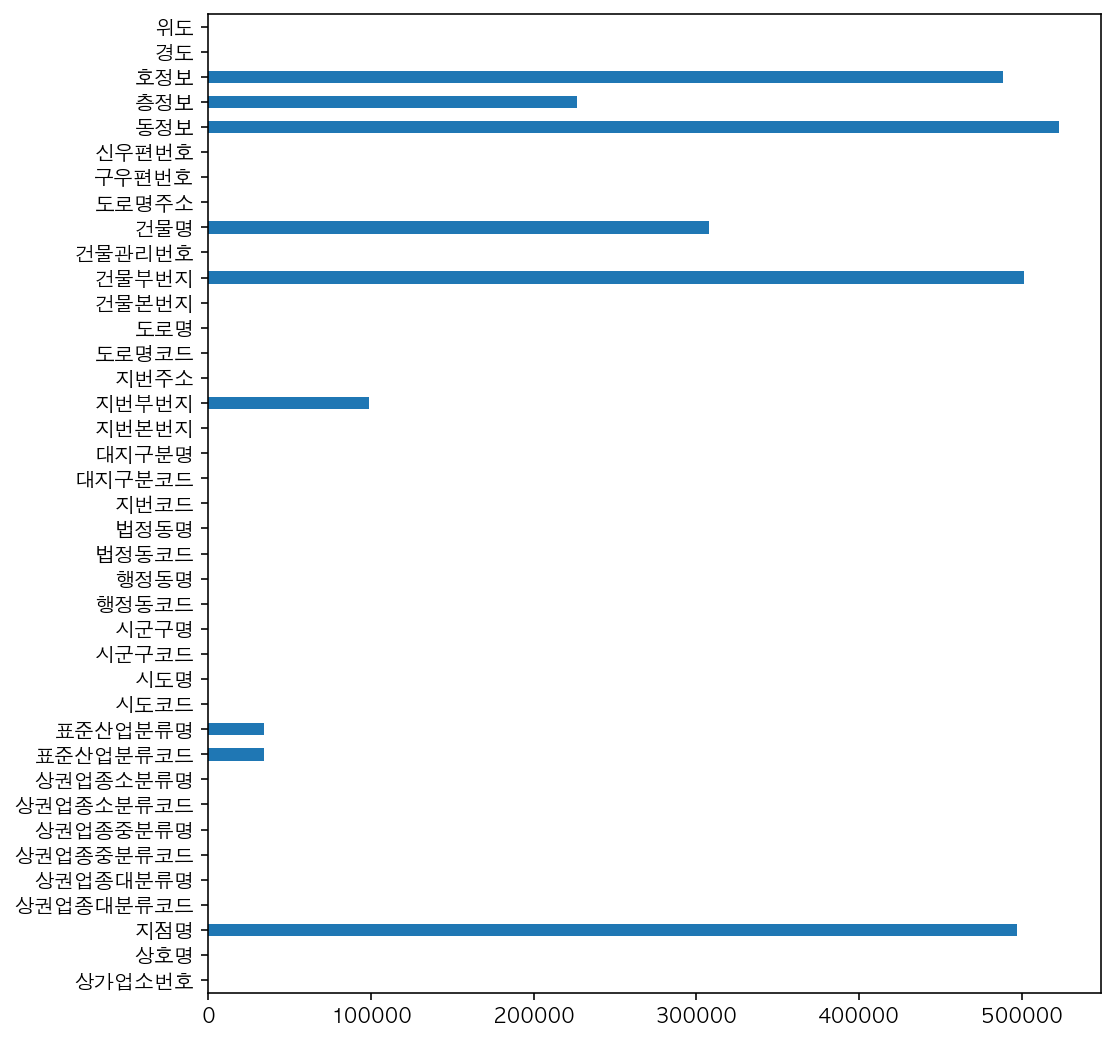

In [11]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.

df.isnull().sum().plot.barh(figsize=(8, 9))

### 사용하지 않는 컬럼 제거하기

In [60]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
print(df.shape)
df = df[columns].copy()
print(df.shape)

(573680, 11)
(573680, 11)


In [13]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
상호명         573679 non-null object
상권업종대분류명    573680 non-null object
상권업종중분류명    573680 non-null object
상권업종소분류명    573680 non-null object
시도명         573680 non-null object
시군구명        573680 non-null object
행정동명        573680 non-null object
법정동명        573680 non-null object
도로명주소       573680 non-null object
경도          573680 non-null float64
위도          573680 non-null float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [14]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

In [15]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [16]:
# nunique 를 사용하면 중복을 제거한 상호명의 갯수를 세어줍니다.

df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [17]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [18]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.

pd.read_csv("seoul_open_store.csv")

상호명  상권업종대분류명      상권업종중분류명     상권업종소분류명    시도명  시군구명  \
0              와라와라호프        음식          유흥주점        호프/맥주  서울특별시   강남구   
1       커피빈코리아선릉로93길점        음식        커피점/카페  커피전문점/카페/다방  서울특별시   강남구   
2                프로포즈        음식          유흥주점        호프/맥주  서울특별시   금천구   
3            가락사우나내스낵     생활서비스      대중목욕탕/휴게   사우나/증기탕/온천  서울특별시   송파구   
4                 초밥왕        음식        일식/수산물     음식점-초밥전문  서울특별시   송파구   
...               ...       ...           ...          ...    ...   ...   
407371        비파티세리공덕        음식            한식    한식/백반/한정식  서울특별시   마포구   
407372          앤탑PC방  관광/여가/오락  PC/오락/당구/볼링등       인터넷PC방  서울특별시   성동구   
407373       오즈아레나PC방  관광/여가/오락  PC/오락/당구/볼링등       인터넷PC방  서울특별시   강남구   
407374         파인트리네일     생활서비스       이/미용/건강       발/네일케어  서울특별시  영등포구   
407375         마이리틀네일     생활서비스       이/미용/건강       발/네일케어  서울특별시   도봉구   

          행정동명   법정동명                   도로명주소          경도         위도  
0         대치1동    대치동    서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1         역삼1동    역삼동      서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2         독산3동    독산동      서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3          석촌동    석촌동        서울특별시 송파구 가락로 71  127.104071  37.500249  
4         잠실6동    신천동   서울특별시 송파구 올림픽로 293-19  127.102490  37.515149  
...        ...    ...                     ...         ...        ...  
407371     공덕동    공덕동     서울특별시 마포구 마포대로14길 4  126.955059  37.548618  
407372  성수2가3동  성수동2가     서울특별시 성동구 성수일로8길 37  127.054615  37.545853  
407373    논현1동    논현동      서울특별시 강남구 강남대로 492  127.024102  37.506202  
407374     여의동   여의도동     서울특별시 영등포구 국제금융로 10  126.924863  37.525172  
407375     창1동     창동  서울특별시 도봉구 도봉로114길 22-8  127.035145  37.647099  

[407376 rows x 11 columns]

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [19]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [20]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨|베스킨|baskin"), "상호명_소문자"].shape

(468,)

In [21]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(191,)

In [22]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_cafe 변수에 담습니다.
df_31 = df_seoul[
    df_seoul["상호명_소문자"].str.contains(
        '배스킨|베스킨|baskin|던킨|dunkin')].copy()
df_31.head(1)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명 행정동명 법정동명  \
76  배스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시  관악구  청룡동  봉천동   

                도로명주소          경도         위도 상호명_소문자  
76  서울특별시 관악구 관악로 161  126.952166  37.479599  배스킨라빈스

In [23]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

df_31.loc[df_31["상호명_소문자"].str.contains('배스킨|베스킨|baskin'), "브랜드명"] = "배스킨라빈스"
df_31.loc[~df_31["상호명_소문자"].str.contains('배스킨|베스킨|baskin'), "브랜드명"] = "던킨도너츠"
df_31.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
76         배스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   관악구   청룡동  봉천동   
1167        던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  서대문구   신촌동  대현동   
1819  던킨도너츠테크노마트점       음식    패스트푸드    도너츠전문  서울특별시   광진구  구의3동  구의동   
2164       베스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   마포구   서교동  서교동   
2305   던킨도너츠창동하나로       음식    패스트푸드    도너츠전문  서울특별시   도봉구   창4동   창동   

                     도로명주소          경도         위도      상호명_소문자    브랜드명  
76       서울특별시 관악구 관악로 161  126.952166  37.479599       배스킨라빈스  배스킨라빈스  
1167   서울특별시 서대문구 이화여대길 56  126.945369  37.559263        던킨도너츠   던킨도너츠  
1819  서울특별시 광진구 광나루로56길 85  127.095681  37.535713  던킨도너츠테크노마트점   던킨도너츠  
2164     서울특별시 마포구 와우산로 88  126.923809  37.552104       베스킨라빈스  배스킨라빈스  
2305   서울특별시 도봉구 마들로11길 20  127.050818  37.655101   던킨도너츠창동하나로   던킨도너츠

In [24]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
# df_cafe["브랜드명"] = df_cafe["브랜드명"].fillna("던킨도너츠")

In [25]:
# 혹시 채워지지 않은 값이 있다면 어떤 상호인지 확인하기 위해 결괏값에서 '상호명'만 가져오도록 합니다.

df_31["상호명"].unique()

array(['배스킨라빈스', '던킨도너츠', '던킨도너츠테크노마트점', '베스킨라빈스', '던킨도너츠창동하나로',
       '던킨도너츠용산민자역사2호', '베스킨라빈슨', '베스킨라빈스은행나무점', '던킨도너츠교대점',
       '코레일유통던킨도너츠점', '베스킨라빈스31아이스크림', '던킨도너츠건대영존점', '베스킨라빈스마들역점',
       '베스킨라빈스쌍문점', '코레일유통커피앤던킨도너츠', '배스킨라빈스강남중앙', '배스킨라빈스31',
       '베스킨라빈스31홈플러스시흥점', '코레일유통던킨도너츠', '베스킨라빈스목동2단지점', 'baskinrobbins',
       '던킨도너츠성신여대점', '비알코리아훼이버릿디바이배스킨라빈스', '베스킨라빈스가양점', '베스킨라빈스한성대역점',
       '비알코리아베스킨라빈스', '배스킨라빈스청량리역사점', '베스킨라빈스신도림테크노마트', '베스킨라빈스아이스크림',
       '베스킨라빈스미아역점', '배스킨라빈스31성내역점', '비알코리아베스킨라빈스강', '에이엠플러스자산개발베스킨라빈스',
       '비알코리아던킨도너츠목동', '비알코리아던킨도너츠건대', '비알코리아베스킨라빈스양', '비알코리아던킨도너츠서울',
       '비알코리아던킨도너츠은행', '비알코리아던킨도너츠고대', '비알코리아던킨도너츠서여', '비알코리아던킨도너츠중',
       '던킨도너츠합정역사점', '던킨도너츠올림픽공원점', '던킨', '비알코리아던킨도너츠두산',
       '비알코리아베스킨라빈스청량리역사', '비알코리아던킨도너츠동부', '던킨도넛', '던킨도너츠압구정소망',
       '던킨도너츠동대문', '던킨도너츠오목교', '던킨도너츠보라매타운점', '배스킨라빈스방이역점', '배스킨라빈스남성역점',
       '배스킨라빈스성동금호점', '던킨도너츠김포국제공항점', '던킨도너츠중앙보훈병원점', '배스킨라빈스교대점',
       '써타원베스킨란빈스', '던킨도너츠광장점', '배스킨라빈스동대문홈플러스', '배

In [26]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
df_31[["상호명", "브랜드명"]].head()

상호명    브랜드명
76         배스킨라빈스  배스킨라빈스
1167        던킨도너츠   던킨도너츠
1819  던킨도너츠테크노마트점   던킨도너츠
2164       베스킨라빈스  배스킨라빈스
2305   던킨도너츠창동하나로   던킨도너츠

### 범주형 값으로 countplot 그리기

In [27]:
# 상권업종대분류명 으로 seaborn 의 countplot 을 사용해 시각화를 합니다.
# seaborn 의 countplot는 같은 데이터를 그룹화하여 더해준 값을 그래프로 표현합니다.

df_31["상권업종대분류명"].value_counts()

음식       657
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [28]:
# "상권업종대분류명" "소매", "생활서비스" 인 데이터만 가져옵니다.
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
358699         배스킨라빈스       소매    종합소매점      할인점  서울특별시  강남구  압구정동  신사동   
556592  baskinrobbins    생활서비스    광고/인쇄     인쇄종합  서울특별시  강남구  역삼1동  역삼동   

                     도로명주소          경도         위도        상호명_소문자    브랜드명  
358699  서울특별시 강남구 압구정로 204  127.029381  37.527375         배스킨라빈스  배스킨라빈스  
556592  서울특별시 강남구 강남대로 396  127.028289  37.498154  baskinrobbins  배스킨라빈스

In [29]:
# "상권업종대분류명"에서 "생활서비스"는 제외합니다.
print(df_31.shape)
df_31 = df_31[df_31["상권업종대분류명"] != "생활서비스"].copy()
print(df_31.shape)

(659, 13)
(658, 13)


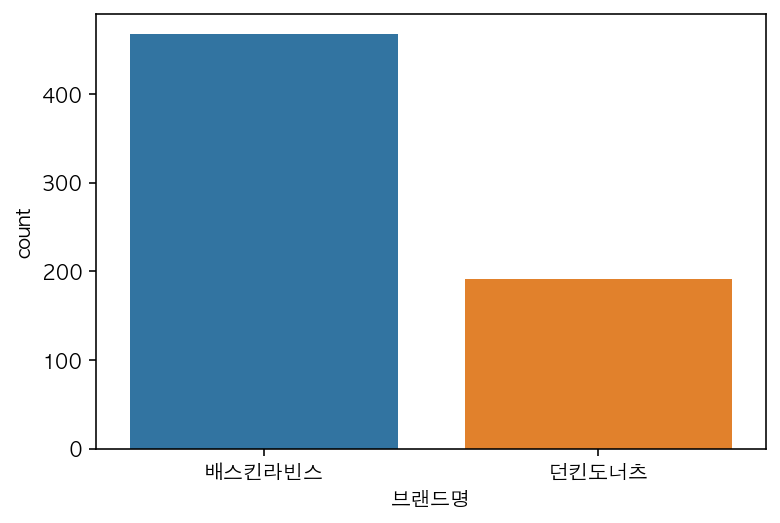

In [30]:
sns.countplot(data=df_31, x="브랜드명")

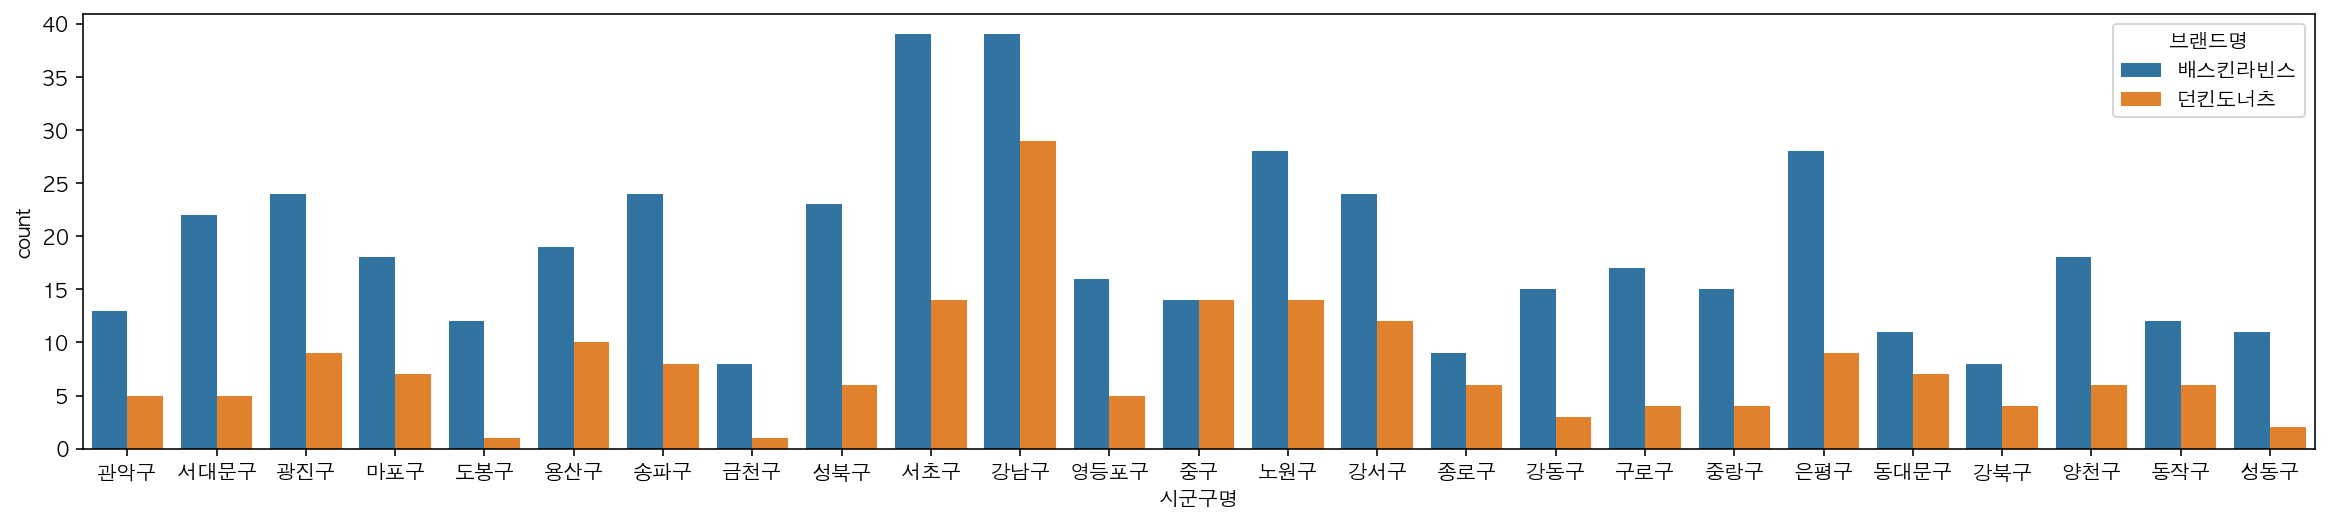

In [31]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

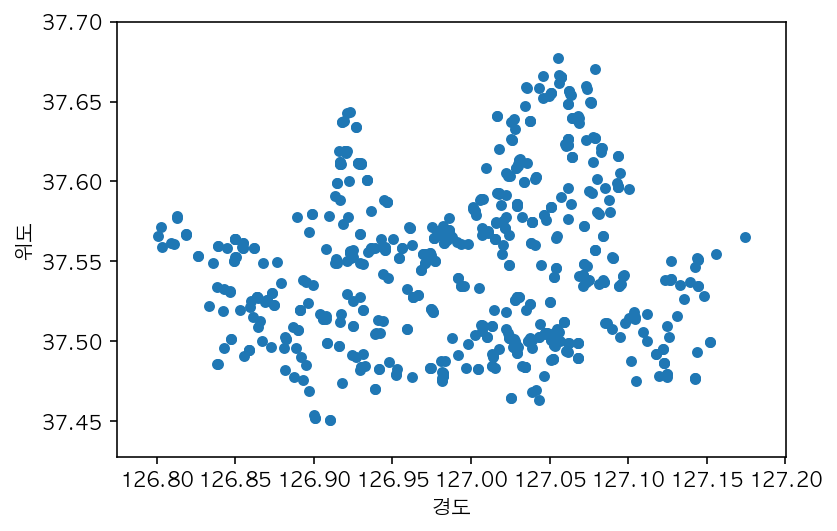

In [32]:
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

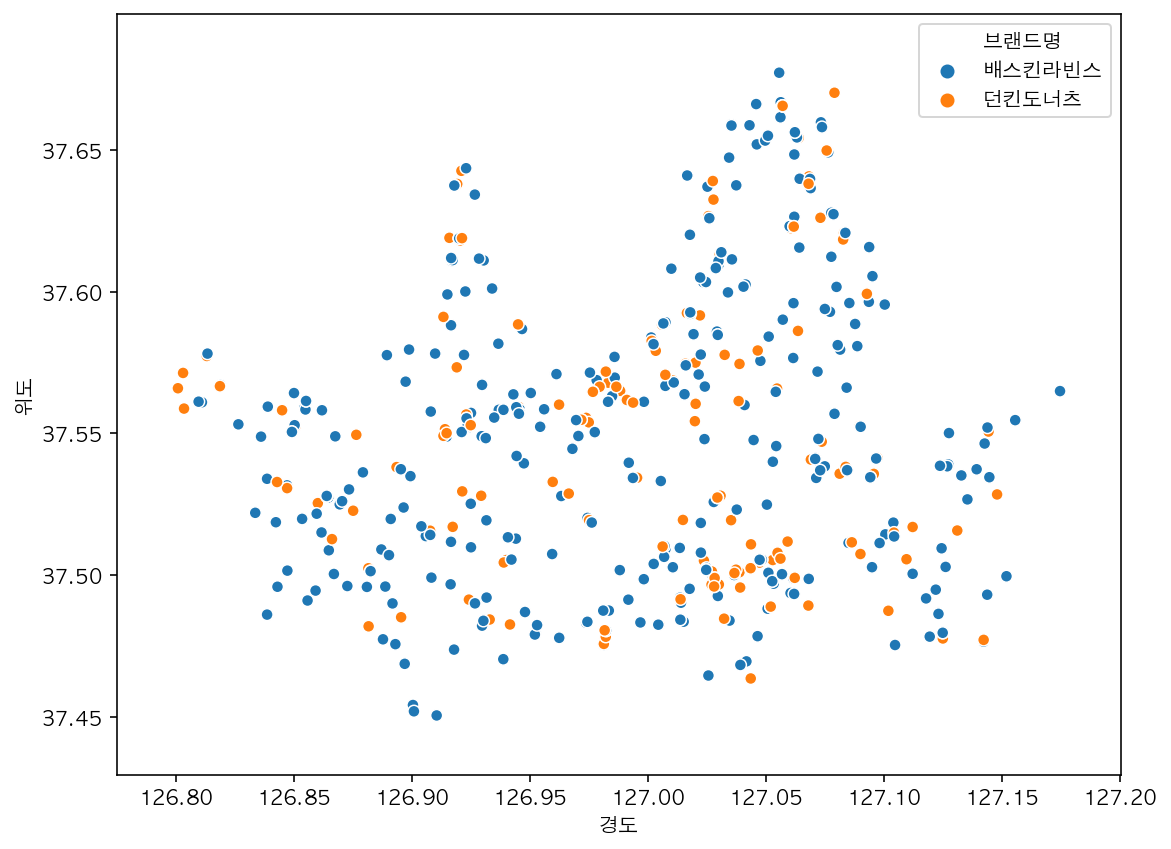

In [33]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

plt.figure(figsize=(9, 7))
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

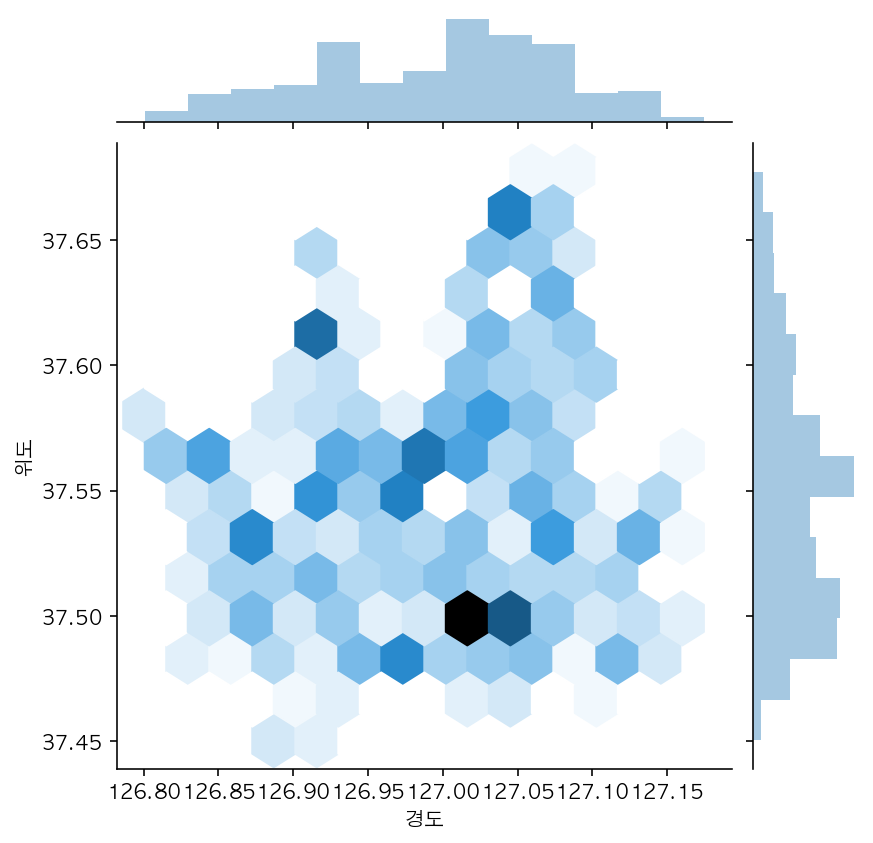

In [34]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

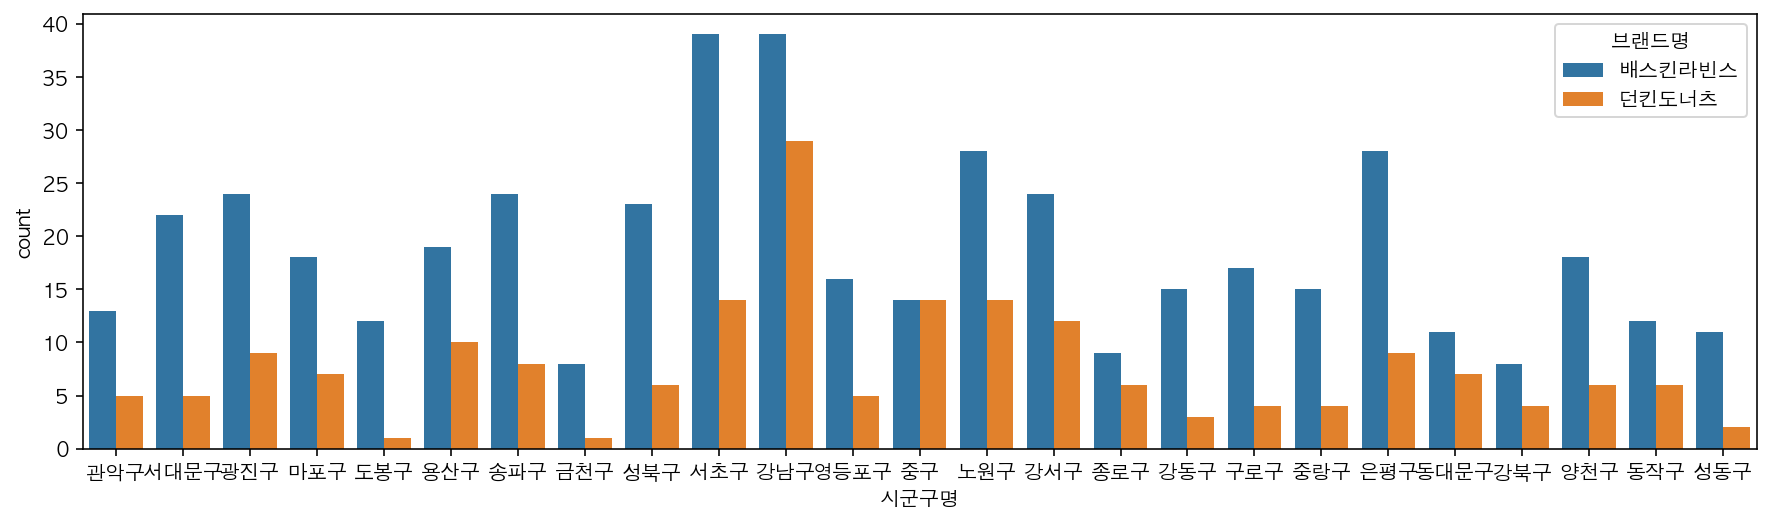

In [35]:
# Pandas 로 시각화를 하는 방법도 있지만 seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해줍니다.
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 됩니다. 
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합합니다.
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 합니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">

* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [36]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [37]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548399144429546, 126.99463765025781)

In [38]:
df_31.sample(random_state=31)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
416638  던킨도너츠홍제역점       음식    패스트푸드    도너츠전문  서울특별시  서대문구  홍제3동  홍제동   

                     도로명주소          경도         위도    상호명_소문자   브랜드명  
416638  서울특별시 서대문구 통일로 442  126.944911  37.588507  던킨도너츠홍제역점  던킨도너츠

In [39]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

map = folium.Map(location=[lat, long], zoom_start=11)

folium.CircleMarker([37.534303, 126.994781], 
                    radius=5, 
                    color="green", 
                    tooltip="서울특별시 용산구 이태원동 127-6"
                   ).add_to(map)
map

In [40]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.


### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [41]:
# 데이터프레임의 인덱스만 출력합니다.


df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   2652,   3007,
             11060,  13042,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=658)

### 기본 마커로 표현하기

In [42]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map(location=[lat, long], zoom_start=11)

for n in df_31.index:
    tooltip = f"{df_31.loc[n, '상호명']} : {df_31.loc[n, '도로명주소']}"
    lat = df_31.loc[n, "위도"]
    long = df_31.loc[n, "경도"]
    icon_color = "blue"
    
    if df_31.loc[n, '브랜드명'] == "던킨도너츠":
        icon_color = "red"
    
    folium.CircleMarker([lat, long], 
                        radius=3, 
                        color=icon_color, 
                        tooltip=tooltip
                       ).add_to(m)
    
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [43]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

m = folium.Map(location=[lat, long], zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)
    
for n in df_31.index:
    tooltip = f"{df_31.loc[n, '상호명']} : {df_31.loc[n, '도로명주소']}"
    lat = df_31.loc[n, "위도"]
    long = df_31.loc[n, "경도"]
    icon_color = "blue"
    
    if df_31.loc[n, '브랜드명'] == "던킨도너츠":
        icon_color = "red"
    
    folium.CircleMarker([lat, long], 
                        radius=3, 
                        color=icon_color, 
                        tooltip=tooltip
                       ).add_to(marker_cluster)
m


## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [44]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.

df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게|크라상)')].copy()
df_bread.shape

/Users/corazzon/codes/jupyter/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(825, 12)

### 가져온 데이터가 맞는지 확인하기

In [45]:
# 잘못 가져온 데이터가 있는지 확인합니다.
df_bread["상권업종중분류명"].value_counts()

제과제빵떡케익       814
커피점/카페          7
학원-자격/국가고시      2
패스트푸드           1
양식              1
Name: 상권업종중분류명, dtype: int64

In [46]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.
df_bread[df_bread["상권업종중분류명"].isin(["학원-자격/국가고시", "양식", "패스트푸드"])]

상호명 상권업종대분류명    상권업종중분류명  상권업종소분류명    시도명  시군구명  행정동명    법정동명  \
306548     파리바게뜨       음식       패스트푸드     패스트푸드  서울특별시   강동구  성내2동     성내동   
354693  파리바게뜨교육소    학문/교육  학원-자격/국가고시   학원-제과기술  서울특별시  영등포구  영등포동  영등포동8가   
406627      뚜레쥬르    학문/교육  학원-자격/국가고시   학원-제과기술  서울특별시   금천구   가산동     가산동   
448186     파리크라상       음식          양식  정통양식/경양식  서울특별시   송파구   삼전동     삼전동   

                        도로명주소          경도         위도   상호명_소문자  
306548    서울특별시 강동구 천호대로 1092  127.132766  37.535172     파리바게뜨  
354693     서울특별시 영등포구 영중로 159  126.905405  37.530553  파리바게뜨교육소  
406627  서울특별시 금천구 가산디지털1로 128  126.883684  37.477224      뚜레쥬르  
448186      서울특별시 송파구 삼전로 102  127.090935  37.507231     파리크라상

In [47]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.
df_bread = df_bread[df_bread["상권업종대분류명"] != "학문/교육"].copy()
df_bread.shape

(823, 12)

In [48]:
df_bread["상호명"].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [49]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.
df_bread = df_bread[~df_bread['상호명'].str.contains('파스쿠찌|잠바주스')].copy()
df_bread.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명    행정동명 법정동명  \
2935          뚜레쥬르       음식  제과제빵떡케익      제과점  서울특별시  노원구    공릉2동  공릉동   
13843         뚜레쥬르       음식  제과제빵떡케익      제과점  서울특별시  서초구    서초4동  서초동   
14031  파리바게뜨길동사거리점       음식  제과제빵떡케익      제과점  서울특별시  강동구    성내3동  성내동   
14229   파리바게뜨상계제일점       음식  제과제빵떡케익      제과점  서울특별시  노원구   상계10동  상계동   
14246    뚜레쥬르중계브라운       음식  제과제빵떡케익      제과점  서울특별시  노원구  중계2.3동  중계동   

                       도로명주소          경도         위도      상호명_소문자  
2935       서울특별시 노원구 공릉로 213  127.077295  37.628289         뚜레쥬르  
13843     서울특별시 서초구 서초대로 411  127.025904  37.498098         뚜레쥬르  
14031    서울특별시 강동구 천호대로 1128  127.136501  37.534154  파리바게뜨길동사거리점  
14229      서울특별시 노원구 노원로 540  127.059227  37.661367   파리바게뜨상계제일점  
14246  서울특별시 노원구 동일로203가길 29  127.064245  37.639918    뚜레쥬르중계브라운

In [50]:
df_bread.loc[df_bread['상호명'].str.contains('파리바게|파리크라상'), '브랜드명'] = '파리바게뜨'
df_bread["브랜드명"].head()

2935       NaN
13843      NaN
14031    파리바게뜨
14229    파리바게뜨
14246      NaN
Name: 브랜드명, dtype: object

In [51]:
df_bread["브랜드명"] = df_bread["브랜드명"].fillna("뚜레쥬르")

### 범주형 변수 빈도수 계산하기

In [52]:
df_bread["브랜드명"].value_counts()

파리바게뜨    555
뚜레쥬르     257
Name: 브랜드명, dtype: int64

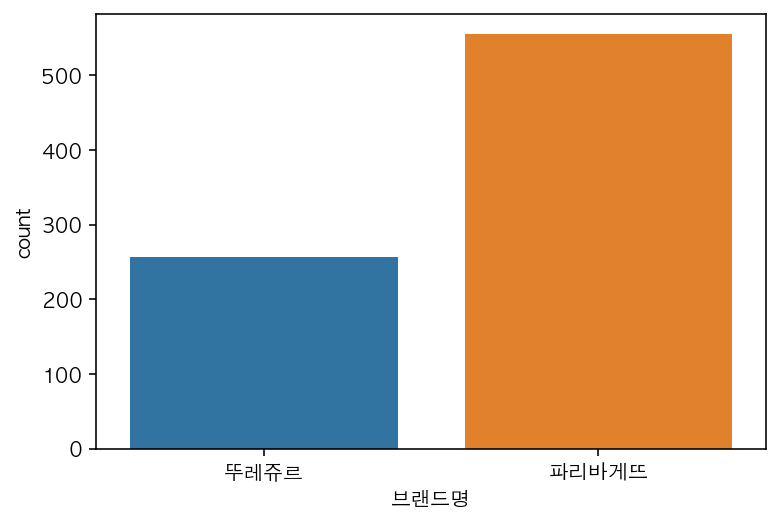

In [53]:
sns.countplot(data=df_bread, x="브랜드명")

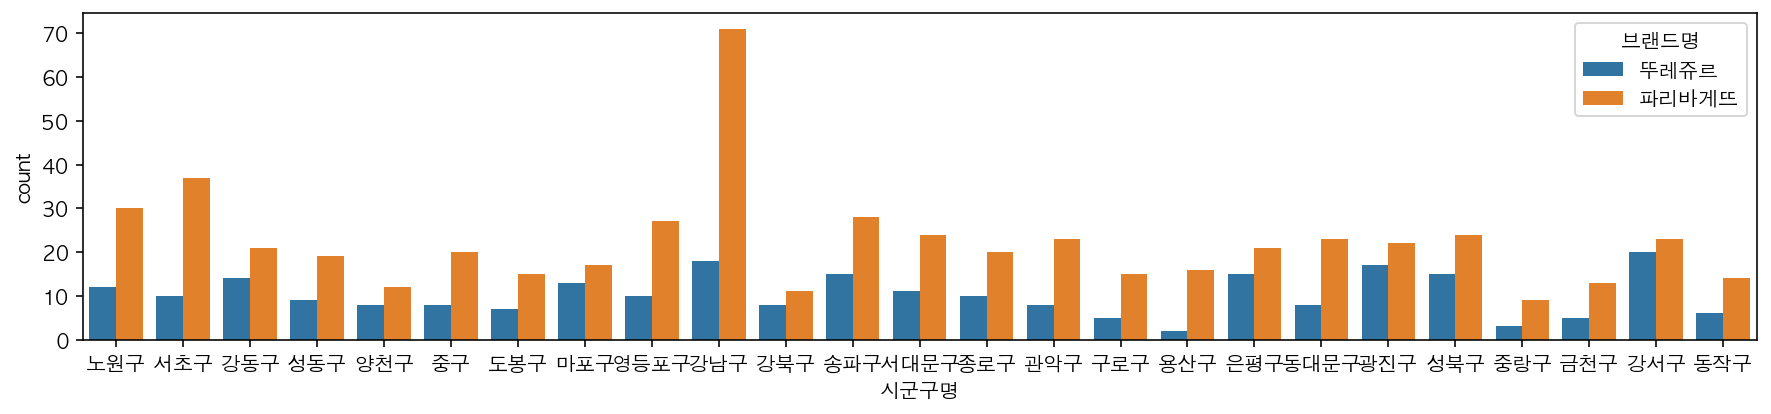

In [54]:
plt.figure(figsize=(15, 3))
sns.countplot(data=df_bread, x="시군구명", hue="브랜드명")

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [55]:
m = folium.Map(location=[lat, long], zoom_start=11)

for n in df_bread.index:
    tooltip = f"{df_bread.loc[n, '상호명']} : {df_bread.loc[n, '도로명주소']}"
    lat = df_bread.loc[n, "위도"]
    long = df_bread.loc[n, "경도"]
    icon_color = "blue"
    
    if df_bread.loc[n, '브랜드명'] == "뚜레쥬르":
        icon_color = "green"
    
    folium.CircleMarker([lat, long], 
                        radius=3, 
                        color=icon_color, 
                        tooltip=tooltip
                       ).add_to(m)
    
m

### MarkerCluster 로 표현하기

In [56]:
m = folium.Map(location=[lat, long], zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)    
    
for n in df_bread.index:
    tooltip = f"{df_bread.loc[n, '상호명']} : {df_bread.loc[n, '도로명주소']}"
    lat = df_bread.loc[n, "위도"]
    long = df_bread.loc[n, "경도"]
    icon_color = "blue"
    
    if df_bread.loc[n, '브랜드명'] == "뚜레쥬르":
        icon_color = "green"
    
    folium.CircleMarker([lat, long], 
                        radius=3, 
                        color=icon_color, 
                        tooltip=tooltip
                       ).add_to(marker_cluster)
    
m

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [57]:
# heatmap 예제 이해하기
import numpy as np

data = (
    np.random.normal(size=(100, 3)) *
    np.array([[1, 1, 1]]) +
    np.array([[48, 5, 1]])
).tolist()
data[:5]

[[47.579418050800946, 5.502658079530028, 3.2702708571606434],
 [48.31153342616334, 4.589974143916815, 0.04633589776079006],
 [50.43182566185702, 5.718594244772985, 1.194252921584021],
 [49.3961621831337, 4.580213091383812, 1.6726278181867462],
 [49.718399166023154, 5.689834531742594, 0.23400370517000557]]

In [58]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기
d = df_bread[["위도", "경도", "브랜드명"]].copy()
d["브랜드명"] = d["브랜드명"].replace("뚜레쥬르", 0).replace("파리바게뜨", 1)
d = d.values
d

array([[ 37.62828881, 127.07729473,   0.        ],
       [ 37.49809817, 127.02590362,   0.        ],
       [ 37.53415376, 127.13650069,   1.        ],
       ...,
       [ 37.48095516, 126.95062029,   1.        ],
       [ 37.5811105 , 126.89096576,   1.        ],
       [ 37.59064662, 127.06512283,   1.        ]])

In [59]:
# HeatMap 그리기
from folium.plugins import HeatMap
m = folium.Map(location=[lat, long], tiles='stamentoner', zoom_start=11)

HeatMap(d).add_to(m)

marker_cluster = MarkerCluster().add_to(m)    
    
for n in df_bread.index:
    tooltip = f"{df_bread.loc[n, '상호명']} : {df_bread.loc[n, '도로명주소']}"
    lat = df_bread.loc[n, "위도"]
    long = df_bread.loc[n, "경도"]
    icon_color = "blue"
    
    if df_bread.loc[n, '브랜드명'] == "뚜레쥬르":
        icon_color = "green"
    
    folium.CircleMarker([lat, long], 
                        radius=3, 
                        color=icon_color, 
                        tooltip=tooltip
                       ).add_to(marker_cluster)
    


    
m